# PRJDB19812 Honda et al.

Article link: [Honda](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0317076).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJDB19812"
lineages_in_paper <- c(
    "XBT", "XBB.1.9.1", "BA.2.75", "XBB.1.16", "EG.5", "BA.5"
)


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,22689,-22690.1,del:22690:1,7.292350e-05,27426,2,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
2,22950,-22951.1,del:22951:1,1.104444e-04,27163,3,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
3,22983,-22984.1,del:22984:1,7.362686e-05,27164,2,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
4,22576,~22577C,aa:S:G339R,9.989057e-01,27416,27386,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
5,22577,~22578A,aa:S:G339D,9.993799e-01,27416,27399,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
6,22579,~22580C,aa:S:E340Q,7.293414e-05,27422,2,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000


In [3]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1] "Lineages not in barcodes:"
character(0)


[1]   6 130

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  0.637   0.007   0.652 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,8.798934e-04,NA,NA,EG.5,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
2,8.842389e-04,NA,NA,XBB.1.16,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
3,2.289843e-01,NA,NA,XBB.1.9.1,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
4,2.359469e-01,NA,NA,XBT,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
5,4.651589e-01,NA,NA,BA.2.75,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000
6,8.011605e-09,NA,NA,BA.5,DRR624547,2023-03-01,DRS460155,601,16680038,PRJDB19812,Hamamatsu,450000


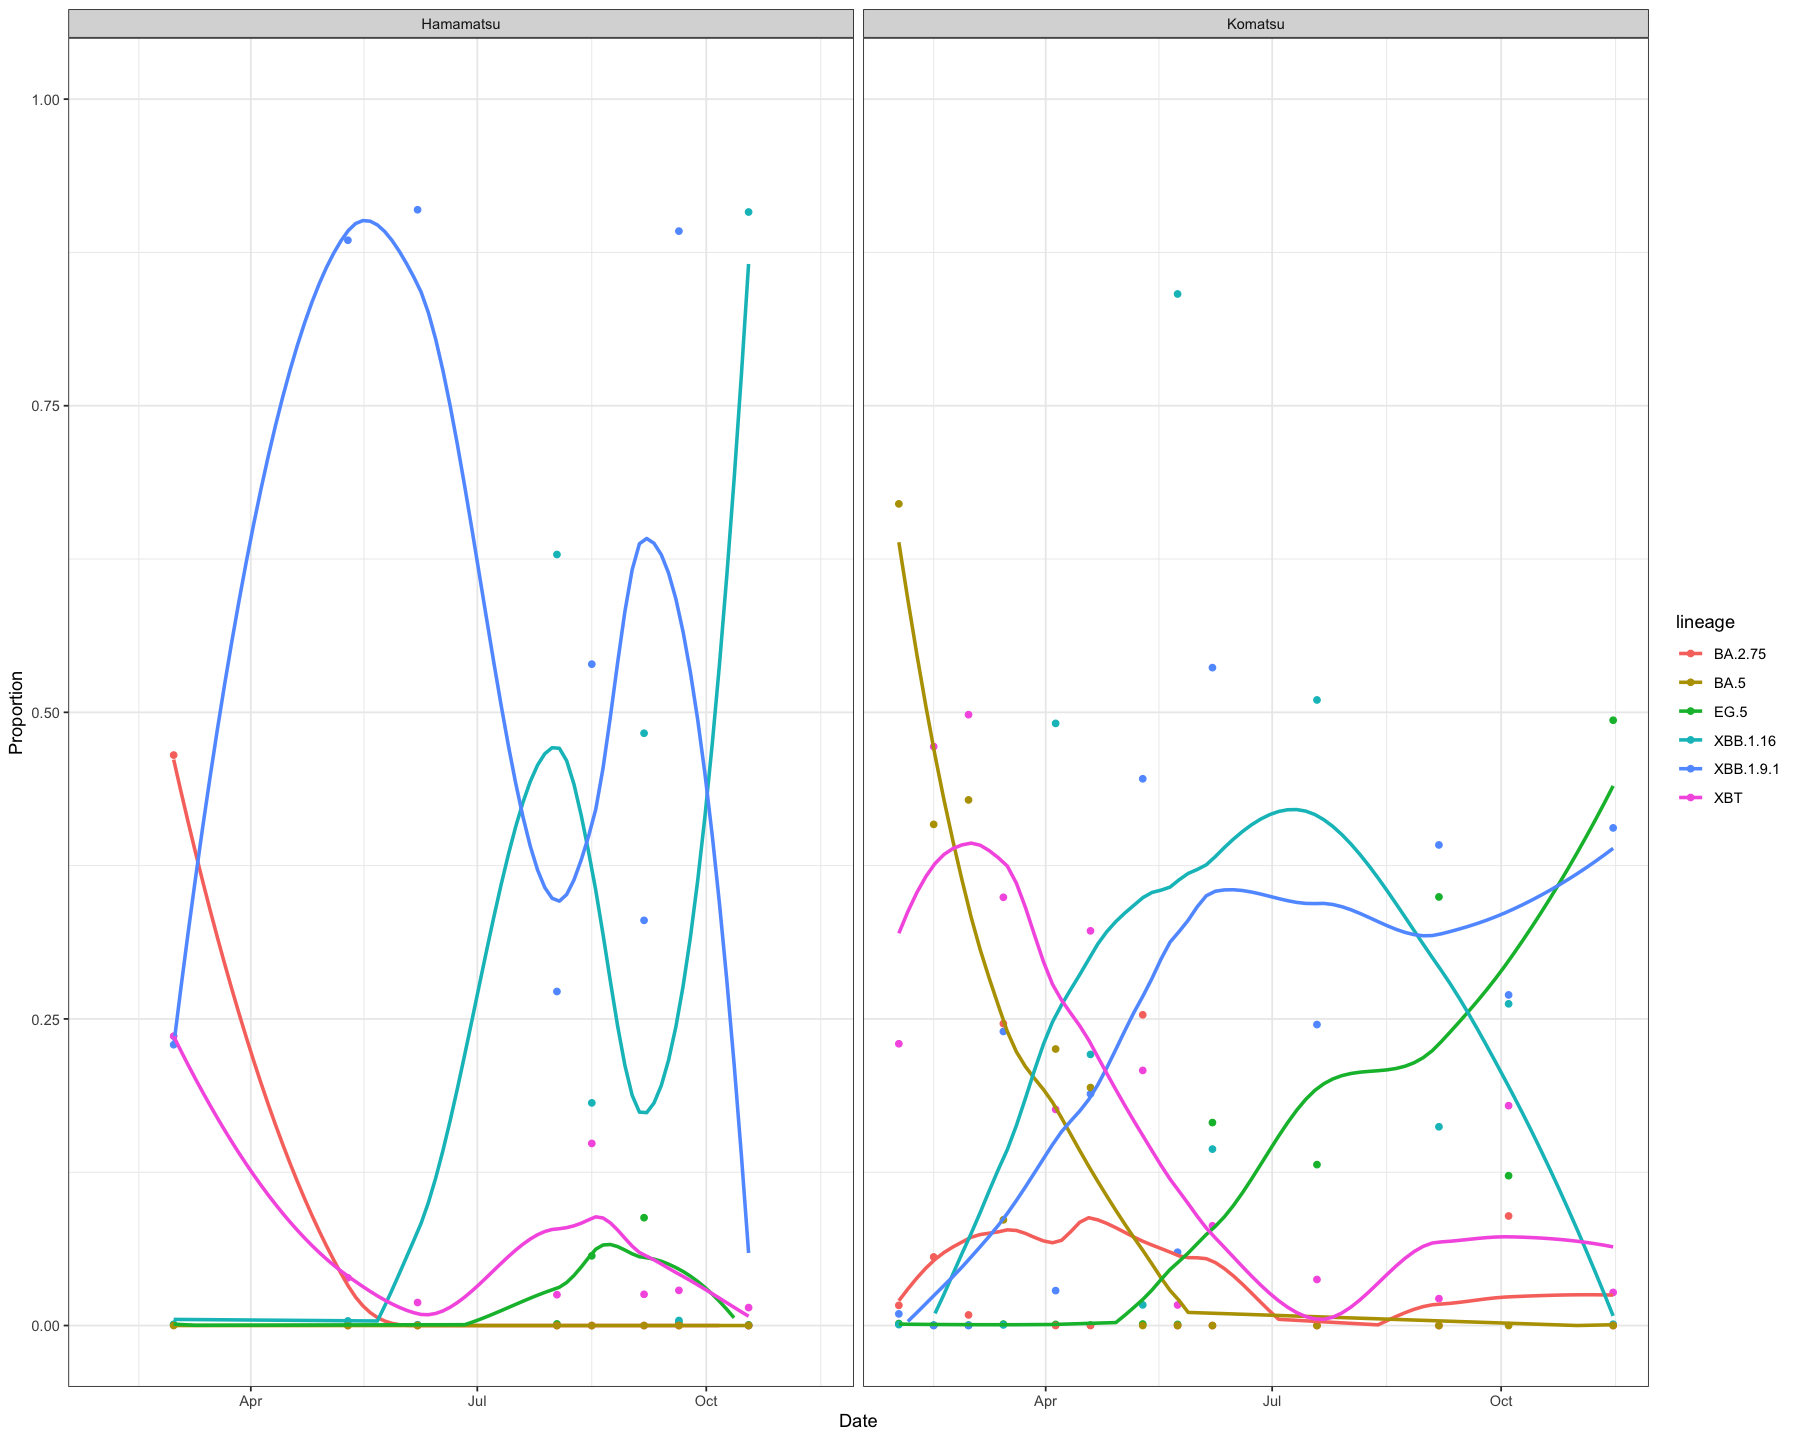

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
